<a href="https://colab.research.google.com/github/gouravreddy02/Droplet-Size-In-a-Microfluidic-Device/blob/main/Multivariate_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [ ]:
df = pd.read_csv('Droplet_Size.csv')

In [ ]:
df.shape

(60, 3)

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
reg = LinearRegression().fit(X, Y)


<Axes: xlabel='Flow rate Ratio', ylabel='Size'>

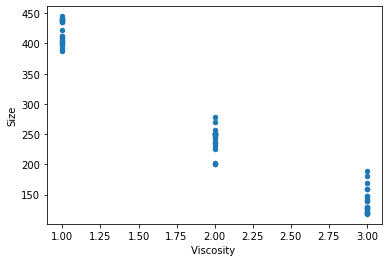

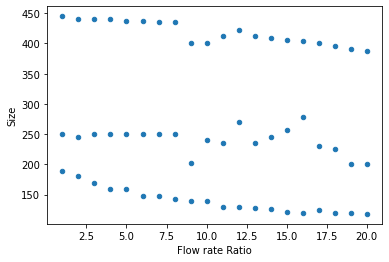

In [ ]:
df.plot.scatter ("Viscosity ","Size")
df.plot.scatter ("Flow rate Ratio","Size")


In [ ]:
print("Intercept: ", reg.intercept_)
print("Coefficients: ", reg.coef_)

Intercept:  570.598245614035
Coefficients:  [-138.5          -2.60776942]


# K-fold cross validation

In [ ]:
# specify the number of folds for k-fold cross-validation
num_folds = 5

# create a KFold object to generate the folds
kf = KFold(n_splits=num_folds, shuffle=True)

# create a list to store the mean absolute errors for each fold
mae_list = []

# loop over the folds and fit a model to each training set, then evaluate the model on the test set
for train_idx, test_idx in kf.split(X):
    # extract the training and test sets
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    # create a LinearRegression object and fit the model to the training set
    reg = LinearRegression().fit(X_train, Y_train)

    # make predictions on the test set
    Y_pred = reg.predict(X_test)

    # calculate the mean absolute error of the predictions
    mae = np.mean(np.abs(Y_pred - Y_test))

    # add the mean absolute error to the list
    mae_list.append(mae)

# print the mean and standard deviation of the mean absolute errors for all folds
print("Mean MAE: ", np.mean(mae_list))
print("Std Dev MAE: ", np.std(mae_list))

Mean MAE:  19.31483620965843
Std Dev MAE:  2.4092567889760956


# Effeciency

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# make predictions on the entire dataset using the fitted model
Y_pred = reg.predict(X)

# calculate the R-squared score
r2 = r2_score(Y, Y_pred)

# calculate the mean squared error
mse = mean_squared_error(Y, Y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

# print the evaluation metrics
print("R-squared score: ", r2)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

R-squared score:  0.9625426309862606
Mean Squared Error:  506.11284735601515
Root Mean Squared Error:  22.49695195700998
